# Building a Neural Network from Scratch

In this project, I have built a fully-connected neural network from scratch using only Numpy to perform digit classification on the MNIST dataset. 



## Requirements 

- A working fully-connected deep neural network from scratch using only numpy.
- Includes dense layers, activations, optimizers, loss functions and sigmoid or softmax in case of classification. 
- Runtime and results on a public dataset.
- Documented code that includes brief summary, technical details, and results. 

## Extensions 

A comparison of the model’s runtime and performance with/without each component:
- More than 1 optimizer - SGD, Momentum, RMSProp, Adam etc.
- Regularization - L2/weight decay, dropout, possibly augmentations if image data etc.
- Results on more than 1 dataset.


### Load the dataset

First, I load the MNIST dataset of 70,000 digit images from sklearn and split it into training (60,000 images) and test set (10,000 images). 

In [1]:
import numpy as np

## load MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784')
X = mnist.data
y = mnist.target

X = X /255 #normalize for simplicity 

#split into test and train sets 
m = 60000
m_test = X.shape[0] - m
X_train, X_test = np.array(X[:m]), np.array(X[m:])

#one-hot encode mnist labels for classification 
digits =10 
examples = 70000
y_new = np.array(y, dtype='int32').reshape(-1)
y_new = np.eye(10)[y_new]
Y_train, Y_test = np.array(y_new[:m]), np.array(y_new[m:])

In [3]:
#Define functions for neural network 

def sigmoid(Z):
    """
    Sigmoid activation function.
    """
    return 1/(1+np.exp(-Z))

def der_sigmoid(Z):
    """
    Derivative of sigmoid activation function.
    """
    return sigmoid(Z) * (1 - sigmoid(Z))

def cross_entropy(Y, Y_hat):
    """
    Binary cross entropy loss function.
    """
    L = -np.log(np.max(Y_hat * Y, axis=1) + 1e-8) #add small number to avoid zero error
    L = np.average(L)
    return L

def softmax(x):
    """Computes softmax values for each sets of scores in x."""
    prob = []
    for arr in x:
        exponentiated = [np.exp(x) for x in arr]
        denominator = np.sum(exponentiated)
        prob.append([x / denominator for x in exponentiated])
    return np.array(prob)

def accuracy(y, y_hat):
    '''Computes accuracy of model preDictions .
    '''
    bools = np.argmax(y_hat, axis=1) == np.argmax(y, axis=1)
    return np.average(bools.astype(int))

In [22]:
input_size = 784 #the input layer has 784 pixels as nodes 
learning_rate = 5 
batch_size = 60 #specify batch size for mini-batch gradient descent 

#Initialization: weights and biases

#weights can be very small non-zero random numbers 
w1 = 0.001 * np.random.randn(input_size,64) 
w2 = 0.001 * np.random.randn(64,10)
#biases can be zeros at the start 
b1 = np.zeros(64) 
b2 = np.zeros(10)

def gradient_descent(X, y, forward_only=False):
    """Performs gradient descent on MNIST data to compute loss and accuracy. 
    """
    
    #weights and biases are globally initialized 
    global w2
    global b2
    global w1
    global b1
    
    #### Forward Propagation ####
    
    z1 = np.dot(X,w1) + b1 #multipy weights by input nodes and add bias 
    s1 = sigmoid(z1) #put it through the activation function 
    z2 = np.dot(s1,w2) + b2  #multipy weights by previous nodes and add bias 
    y_hat = softmax(z2) #softmax outputs probabilities as the model output 
    L = cross_entropy(y,y_hat) #compute loss using model output and true labels
    acc = accuracy(y, y_hat) #compute accuracy of predictions
    
    if forward_only: #for testing, only forward propagate  
        return L, acc
    
    
    #### Backward propagation ####
    
    #Apply chain rule on each layer to see how cost changes with respect to 
    #each component of weights matrix and each bias 
    
    #Gradients for Layer 2 
    d_z2 = y_hat - y 
    d_w2 = s1.T.dot(d_z2) # 
    d_b2 = np.sum(d_z2, axis=0)
    d_s1 = der_sigmoid(z1) * d_z2.dot(w2.T)
    
    #Gradients for Layer 1
    d_w1 = X.T.dot(d_s1)
    d_b1 = np.sum(d_w1, axis=0)
    
    #Use gradients to update weights and biases
    w2 = (w2 - (learning_rate * (d_w2 / m)))
    b2 = (b2 - (learning_rate * (d_b2 / m)))
    w1 = (w1 - (learning_rate * (d_w1 / m)))
    b1 = (b1 - (learning_rate * (d_b1 / m)))
    
    return L, acc


def run_epoch(X, y, n, test=False):
    '''Computes loss and accuracy for one epoch using mini-batch gradient descent. 
    '''
    index = np.arange(n)
    np.random.shuffle(index)
    X = X[index]
    y = y[index]
    
    batch_count = m / batch_size
    X_batches = np.array_split(X, batch_count)
    y_batches = np.array_split(y, batch_count)
    
    losses = []
    accs = []
    for i in range(len(X_batches)):
        loss, acc = gradient_descent(X_batches[i], y_batches[i], forward_only=test)
        losses.append(loss)
        accs.append(acc)
    return np.average(losses), np.average(accs)




In [5]:
num_epochs = 300
train_losses = []
train_accuracies = []
for i in range(num_epochs):
    loss, acc = run_epoch(X_train,Y_train,m)
    train_losses.append(loss)
    train_accuracies.append(acc)
    print(f"Epoch {i} Loss: {loss}, Accuracy: {acc}")


Epoch 0 Loss: 2.301538099126011, Accuracy: 0.11166666666666668
Epoch 1 Loss: 2.3012718229577405, Accuracy: 0.11236666666666667
Epoch 2 Loss: 2.300794783400451, Accuracy: 0.11258333333333333
Epoch 3 Loss: 2.2996924550215083, Accuracy: 0.1124
Epoch 4 Loss: 2.2958894411352184, Accuracy: 0.11236666666666667
Epoch 5 Loss: 2.284504548654145, Accuracy: 0.13163333333333332
Epoch 6 Loss: 2.255730325322106, Accuracy: 0.22838333333333333
Epoch 7 Loss: 2.189712702123951, Accuracy: 0.2896166666666667
Epoch 8 Loss: 2.0540259256795053, Accuracy: 0.3589833333333333
Epoch 9 Loss: 1.8502293787023045, Accuracy: 0.4413833333333334
Epoch 10 Loss: 1.6391696611763573, Accuracy: 0.5096666666666667
Epoch 11 Loss: 1.4574235042145696, Accuracy: 0.5612166666666667
Epoch 12 Loss: 1.3090576052046663, Accuracy: 0.6020666666666666
Epoch 13 Loss: 1.1905702093264439, Accuracy: 0.6428166666666666
Epoch 14 Loss: 1.0954028320980067, Accuracy: 0.6780166666666666
Epoch 15 Loss: 1.0167923297421206, Accuracy: 0.70876666666666

Epoch 131 Loss: 0.2461755100601381, Accuracy: 0.9315999999999999
Epoch 132 Loss: 0.2454709770617752, Accuracy: 0.9316833333333333
Epoch 133 Loss: 0.24442040577854102, Accuracy: 0.9318166666666666
Epoch 134 Loss: 0.24357995652488607, Accuracy: 0.9321333333333334
Epoch 135 Loss: 0.24287777592064083, Accuracy: 0.9323333333333332
Epoch 136 Loss: 0.24193186035609143, Accuracy: 0.9327
Epoch 137 Loss: 0.2411175498440461, Accuracy: 0.9323666666666666
Epoch 138 Loss: 0.24030305826323967, Accuracy: 0.9328333333333333
Epoch 139 Loss: 0.23952270724787555, Accuracy: 0.9330833333333333
Epoch 140 Loss: 0.2385802672196537, Accuracy: 0.9333499999999999
Epoch 141 Loss: 0.23780659134934096, Accuracy: 0.9337499999999999
Epoch 142 Loss: 0.23704795326002293, Accuracy: 0.9337666666666666
Epoch 143 Loss: 0.23625913682412017, Accuracy: 0.9339666666666666
Epoch 144 Loss: 0.2354047613089837, Accuracy: 0.9341166666666666
Epoch 145 Loss: 0.23474852875474805, Accuracy: 0.9344333333333332
Epoch 146 Loss: 0.233899032

Epoch 259 Loss: 0.17246251915333569, Accuracy: 0.9525833333333332
Epoch 260 Loss: 0.17199919739046315, Accuracy: 0.9526499999999999
Epoch 261 Loss: 0.17165594042058574, Accuracy: 0.9525333333333333
Epoch 262 Loss: 0.17131379813170436, Accuracy: 0.9525999999999999
Epoch 263 Loss: 0.17092954499258098, Accuracy: 0.9527666666666665
Epoch 264 Loss: 0.17054495621523483, Accuracy: 0.9529666666666666
Epoch 265 Loss: 0.17021465016863419, Accuracy: 0.9529499999999999
Epoch 266 Loss: 0.16981347953174236, Accuracy: 0.9532333333333333
Epoch 267 Loss: 0.16945917157457485, Accuracy: 0.9531166666666666
Epoch 268 Loss: 0.16905718665726657, Accuracy: 0.9533666666666666
Epoch 269 Loss: 0.16874019708799207, Accuracy: 0.9533999999999999
Epoch 270 Loss: 0.1683854711369862, Accuracy: 0.9535
Epoch 271 Loss: 0.16798435920686103, Accuracy: 0.9536333333333332
Epoch 272 Loss: 0.16765305390123256, Accuracy: 0.9538666666666665
Epoch 273 Loss: 0.1673344218291963, Accuracy: 0.9538166666666666
Epoch 274 Loss: 0.167007

Text(0.5, 1.0, 'Figure 1. Neural Network Losses')

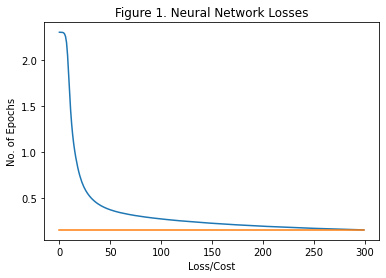

In [18]:
import matplotlib.pyplot as plt

plt.plot(list(range(300)),train_losses)
plt.plot(list(range(300)),test_losses)
plt.xlabel("Loss/Cost")
plt.ylabel("No. of Epochs")
plt.title("Figure 1. Neural Network Performance During Training")

In [20]:
gradient_descent(X_test, Y_test, forward_only=True)

(2.3026500782381394, 0.0892)